<a href="https://colab.research.google.com/github/crdguez/mat4ac/blob/master/notebooks/est_evaluacion_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
# Si lo ejecutas desde google colab
from google.colab import drive
import os
drive.mount('/content/drive')
%cd /content/drive/My Drive/Curso\ Actual/4ac/notebooks
!pwd
#os.chdir('/content/drive/Curso Actual')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Curso Actual/4ac/notebooks
/content/drive/My Drive/Curso Actual/4ac/notebooks


In [138]:
# Import all libraries needed for the tutorial

# General syntax to import specific functions in a library: 
##from (library) import (specific library function)
from pandas import DataFrame, read_csv

# General syntax to import a library but no functions: 
##import (library) as (give the library a nickname/alias)
import matplotlib.pyplot as plt
import pandas as pd #this is how I usually import pandas
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number
import numpy as np

# Enable inline plotting
%matplotlib inline

In [139]:
def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    if type(val)== str:
        color = 'blue ; background: azure'
    else:
        color = 'red; background: khaki' if (val < 5 or val =="") else 'green; background: lightyellow'
    return 'color: %s ; font-size: 12px ; font-weight: bold' % color 

def color_media(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    if type(val)== str:
        color = 'blue ; background: azure'
    else:
        color = 'red; background: gold' if (val < 5 or val =="") else 'black; background: burlywood'
    return 'color: %s ; font-size: 12px ; font-weight: bold'  % color 

def color_suspensos(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    if type(val)== str:
        color = 'blue ; background: azure'
    else:
        color = 'red; background: gold' if (val > 0 or val =="") else 'black; background: darkkhaki'
        
    return 'color: %s ; font-weight: bold ; font-size: 12px' % color 

def evaluaciones_anteriores(val):      
    if type(val)== str:
        color = 'blue ; background: azure'
    else:
        color = 'red; background: khaki' if (val < 5 or val =="") else 'green; background: ghostwhite'
    
    return 'color: %s ; font-size: 8px ; font-weight: lighter' % color 

In [140]:
# Import data

def actilla(fich='importado2', eval=2):
    fichero = fich + '.csv'
    pre_actilla = pd.read_csv(fichero, index_col=False)
    pre_actilla = pre_actilla.drop([col for col in pre_actilla if col.startswith('Unna')], axis=1)
    pre_actilla = pre_actilla.drop("Nº MNS", axis = 1)
    pre_actilla = pd.melt(pre_actilla, id_vars=["Nº","Apellidos, Nombre"], var_name="Asignatura", value_name="Nota")
    pre_actilla = pre_actilla[pre_actilla['Nota'].notna()]
    pre_actilla = pre_actilla.copy()
    pre_actilla['Eval'] = eval
    pre_actilla.Asignatura=pre_actilla.Asignatura.str.replace('\n', ' ')
    return pre_actilla
    

def concatenar_actillas(inicio_nombre_fichero='importado', evaluaciones_a_incluir=2): 
    return pd.concat([actilla(inicio_nombre_fichero + str(n + 1), n + 1) for n in range(evaluaciones_a_incluir)])


evaluaciones_a_incluir = 2

inicio_nombre_fichero = 'importado'


actilla_final = concatenar_actillas(inicio_nombre_fichero,evaluaciones_a_incluir)
#actilla_final = concatenar_actillas('importado',1)
#actilla_final = actilla()
actilla_final = actilla_final.rename(columns={'Apellidos, Nombre':'Alumno'})
actilla_final = actilla_final[['Alumno','Asignatura','Eval','Nota']]
#actilla_final['Nota']=actilla_final['Nota'].astype(int)
actilla_final['Suspenso']=0

# Si sale algún no presentado hay que ejecutar lo siguiente

#actilla_final = actilla_final.drop(actilla_final[actilla_final.Nota == 'NP'].index)
actilla_final.Nota = pd.to_numeric(actilla_final.Nota)
actilla_final.loc[actilla_final['Nota'] < 5, 'Suspenso'] = 1
actilla_final.Nota = actilla_final.Nota.astype(int)
ultima_evaluacion = actilla_final.Eval.max()

actilla_final.to_csv('ev{}.csv'.format(evaluaciones_a_incluir),index=False)



actilla_final

,Alumno,Asignatura,Eval,Nota,Suspenso
0,Alumno_1,2FR II,1,8,0
1,Alumno_2,2FR II,1,7,0
2,Alumno_3,2FR II,1,8,0
4,Alumno_1,BI,1,7,0
5,Alumno_2,BI,1,8,0
...,...,...,...,...,...
40,Alumno_1,PSC,2,9,0
44,Alumno_1,QU,2,7,0
45,Alumno_2,QU,2,7,0
46,Alumno_3,QU,2,8,0


In [141]:
###### df = actilla_final.drop(['Suspenso'], axis=1)
df = actilla_final[actilla_final.Eval <= ultima_evaluacion]

df1 = df.set_index(['Alumno','Asignatura','Eval']).Nota.astype(int).unstack('Asignatura').unstack('Eval')

#df2 = df[df.Eval == ultima_evaluacion].groupby('Alumno')[['Nota']].mean().round(1).rename(columns={'Nota': ('Nota',''+str(ultima_evaluacion)+'ev',str(ultima_evaluacion))})

#df2 = df[df.Eval == ultima_evaluacion].groupby('Alumno')[['Nota']].mean().rename(columns={'Nota': ('Nota',''+str(ultima_evaluacion)+'',str(ultima_evaluacion))})

df2=actilla_final[actilla_final.Eval == ultima_evaluacion].groupby(['Alumno','Eval'])[['Nota']].mean().unstack('Eval').rename(columns={'Nota':'NM'})

df3 = df.groupby(['Asignatura','Eval'])[['Nota']].mean()


#df3.T.round(1)

df4 = pd.concat([df1,df3.T.rename(index={'Nota': 'Media'})])

#df5 = pd.concat([df4,df2], axis=1, sort=False).fillna('-').round(1)

#df5.style.applymap(color_negative_red)

df5 = pd.concat([df4,df2], axis=1, sort=False)
df6 = actilla_final[actilla_final.Eval == ultima_evaluacion].groupby(['Alumno','Eval'])[['Suspenso']].sum().unstack('Eval').rename(columns={'Suspenso':'MNS'})
df5 = pd.concat([df5,df6], axis=1, sort=False)



# calculamos la media de las medias de las notas y la suma total de suspensos
df5.iloc[-1:,-2:-1]=df2.mean()[0]
df5.iloc[-1:,-1:]=df6.sum()[0]

#df5.style.set_precision(0).format("{:.0f}").format("{:.1f}",subset=(df5.index,df5.columns[-1:])).format("{:.1f}",subset=(df5.index[-1:],df5.columns)).applymap(color_negative_red).highlight_null("white").set_na_rep('-')

actilla_estilada = df5.style.set_precision(0) \
    .format("{:.1f}",subset=(df5.index[-1:],df5.columns[:-1])) \
    .format("{:.1f}",subset=(df5.index,df5.columns[-2:-1])) \
    .format("{:.0f}",subset=(df5.index,df5.columns[-1:0])) \
    .applymap(color_negative_red).highlight_null("white") \
    .applymap(color_media, subset=(df5.index[-1:],df5.columns)) \
    .applymap(color_media, subset=(df5.index,['NM'])) \
    .applymap(color_suspensos, subset=(df5.index,['MNS'])) \
    .applymap(evaluaciones_anteriores, subset=(df5.index,df5.columns[df5.columns.get_level_values(1) != ultima_evaluacion])) \
    .set_table_styles([{'selector': 'td','props': [('border', '1px solid black'),('text-align', 'center')]}, \
                       {'selector': 'tr','props': [('border', '1px solid black')]}, \
                       {'selector': 'th','props': [('text-align', 'center'),('font-size','9px')]}
                      ] \
                     ) \
    .set_na_rep('-')






In [142]:
actilla_estilada

In [143]:
import imgkit
imgkit.from_string(actilla_estilada.render(),'actilla.png')

Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               


True

In [144]:
f = open("acta_{}ev.md".format(ultima_evaluacion), "w")
texto = "# Acta de la {}ª evaluación \n\n## Informe actilla: \n ![](actilla.png) \n\n## Resultados generales: \n".format(ultima_evaluacion)
# f.write(texto)
# f.close()

In [145]:
def analisis_df(df, txt_intro ="Tenemos los siguientes datos: \n ",txt_mejor="\n * Sube {}:", txt_peor="\n * **Baja** {}:", txt_igual="\n * Se mantiene {}:", solo_diferencias=False) :
    # analiza los datos de un dataframe donde en el indice están las evaluaciones y en las columnas los items a analizar
    if max(df.index)  > 1 :
        ix = list(df2.index).index(ultima_evaluacion)
        txt = txt_intro
        for c in range(len(df.columns)) :
            if (df2.iloc[ix,c] - df2.iloc[ix-1,c]) > 0 : txt2 = txt_mejor.format(df[df.columns[c]].name)+" Pasa de {} a {}. ".format(str(df2.iloc[ix-1,c]),str(df2.iloc[ix,c]))
            elif (df2.iloc[ix,c] - df2.iloc[ix-1,c]) < 0 : txt2 = txt_peor.format(df[df.columns[c]].name)+" Pasa de {} a {}. ".format(str(df2.iloc[ix-1,c]),str(df2.iloc[ix,c]))
            elif (solo_diferencias) : txt2=""
            else : txt2 = txt_igual.format(df[df.columns[c]].name)+" {}. ".format(str(df2.iloc[ix,c]))              
            txt += txt2
            
        
    else :
        txt = txt_intro
        txt += ", ".join(["{} es {}".format(df[df.columns[c]].name,str(df2.iloc[0,c])) for c in range(len(df.columns))])
#         for c in range(len(df.columns)):
#             txt += "{} es {}".format(df[df.columns[c]].name,str(df2.iloc[0,c]))
            
    

    return txt+" \n ", [df[df.columns[i]] for i in range(len(df.columns))]



In [146]:
df = actilla_final.groupby(['Eval'])[['Alumno','Nota','Suspenso']].aggregate({'Alumno':'nunique','Nota':'mean','Suspenso':'sum'}).rename(columns={'Alumno':'N_al', 'Nota':'Media', 'Suspenso':'N_susp'})
df['Susp_alu']=df['N_susp']/df['N_al']
df['Media']=df['Media'].round(2)
df



,N_al,Media,N_susp,Susp_alu
Eval,,,,
1,4,7.42,1,0.25
2,4,7.06,2,0.50


In [147]:
df2 = df.rename(columns={'N_al':'el número de alumnos', 'Media':'la nota media', 'N_susp':'el número de suspensos','Susp_alu':'el número de suspensos por alumno'}).iloc[:,1:]
df2

,la nota media,el número de suspensos,el número de suspensos por alumno
Eval,,,
1,7.42,1,0.25
2,7.06,2,0.50


In [148]:
texto += "\n\n### Resumen \n"
texto += "\n  {}  \n".format(df.to_markdown())
texto += analisis_df(df2)[0] 
analisis_df(df2)[0]

'Tenemos los siguientes datos: \n \n * **Baja** la nota media: Pasa de 7.42 a 7.06. \n * Sube el número de suspensos: Pasa de 1 a 2. \n * Sube el número de suspensos por alumno: Pasa de 0.25 a 0.5.  \n '

,0 susp.,1 susp.,2 susp.,3 ó 4 susp.,> 4 susp.
Alumnos,3,0,1,0,0


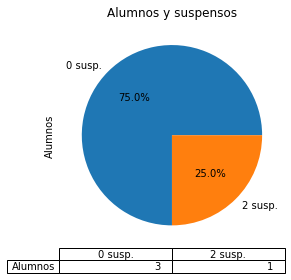

In [149]:
# Alumnos y suspensos

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

df = actilla_final[actilla_final.Eval==ultima_evaluacion].groupby('Alumno').sum().Suspenso
ranges = [0,1,2,3,5,10]
df2 = df.groupby(pd.cut(df, ranges, right=False)).count()
df2.index=['0 susp.','1 susp.','2 susp.','3 ó 4 susp.','> 4 susp.']
df2.name = 'Alumnos'
g0=df2[df2 > 0].plot(kind='pie', title = 'Alumnos y suspensos',autopct='%1.1f%%', table=True)
g0
g0.get_figure().savefig('g0.png')

texto += "\n\n### Resumen de suspensos \n"
texto += "\n \n {} \n".format(df2.to_frame().T.to_markdown())
texto += "\n \n ![](g0.png) \n \n"
df2.to_frame().T

In [150]:
# Alumno-Asignatura-Suspenso
df = actilla_final[(actilla_final.Eval == ultima_evaluacion) & (actilla_final.Suspenso >= 0)][['Alumno','Asignatura','Suspenso']]

# Alumno-Suspenso
df2=df.groupby('Alumno').sum().sort_values('Suspenso', ascending=False)

# Numero Suspenso - Numero alumnos
df3 = df2
df3['N']=1
df3 = df3.groupby('Suspenso').count().sort_index(ascending=False)

display("Alumnos suspensos: \n")

texto += " \n Alumnos con suspensos: \n"
for i in df3[df3.index> 0].index :
    print(f'Con {i} asignatura:')
    texto += "\n* Con {} asignaturas: \n".format(i)
    for j in df2[df2.Suspenso == i].sort_values('Alumno').index : 
        print(" ", j,'(', ', '.join(df[(df.Alumno == j) & (df.Suspenso > 0)]['Asignatura'].values),')')
        texto += "\n    - "+ j+' ('+ ', '.join(df[(df.Alumno == j) & (df.Suspenso > 0)]['Asignatura'].values)+") \n \n"


'Alumnos suspensos: \n'

Con 2 asignatura:
  Alumno_4 ( HE, PS )


Nota,"[0, 3)","[3, 4)","[4, 5)","[5, 6)","[6, 7)","[7, 9)","[9, 10)"
Alumnos,0,0,0,0,1,3,0


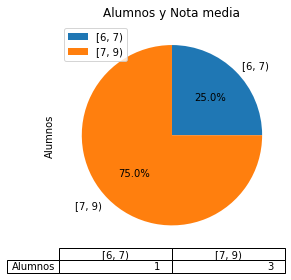

In [151]:
# Alumnos y suspensos
df = actilla_final[actilla_final.Eval==ultima_evaluacion].groupby('Alumno').mean().Nota
ranges = [0,3,4,5,6,7,9,10]
df2 = df.groupby(pd.cut(df, ranges, right=False)).count()
df2.name = 'Alumnos'
g1=df2[df2 > 0].plot(kind='pie', title = 'Alumnos y Nota media',autopct='%1.1f%%', legend = True, table=True)
g1
g1.get_figure().savefig('g1.png')

texto += "\n\n### Resumen de nota media \n"
texto += "\n {} \n".format(df2.to_frame().T.to_markdown())
texto += "\n\n ![](g1.png) \n \n"
df2.to_frame().T

AttributeError: 'Rectangle' object has no property 'auto'

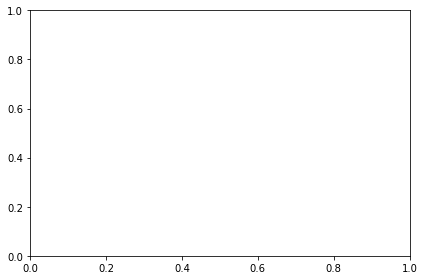

In [156]:
df=actilla_final.groupby(['Alumno','Eval'])[['Nota']].mean().round(2).rename(columns={'Nota':'Media'}).unstack()
g2=df.plot.bar(title='Nota media por alumno',auto='%1.1f%%') 
g2
g2.get_figure().savefig('g2.png')

texto += "\n\n## Alumnos \n\n"
texto += "\n\n### Notas medias \n\n"
texto += " {} ".format(df.to_markdown())
texto += "\n\n ![](g2.png) \n \n"

df


In [153]:
#f = open("acta_{}ev.md".format(ultima_evaluacion), "a")
# texto += "{}".format(df.to_markdown())
# texto += "\n\n ![](g2.png) \n "
# f.write(texto)
# f.close()


In [154]:
# Resultados por alumno
df = actilla_final[actilla_final.Eval <= ultima_evaluacion]

texto += "\n\n### Resultados por alumno \n"
for a in df.groupby('Alumno').nunique().index :
    
    #Resumen de resultados
    df2 = df[(df.Alumno == a) & (df.Eval <= ultima_evaluacion)].groupby(['Alumno','Eval']).aggregate({'Nota':'mean','Suspenso':'sum'})
    df2.index = df2.index.get_level_values(1)
    df2.Nota = df2.Nota.round(2)
    df2 = df2.rename(columns={'Nota':'la nota media', 'Suspenso':'el número de suspensos'})
    display(analisis_df(df2, "En la {}ªev: \n ".format(ultima_evaluacion),txt_igual="\n * Mantiene {}")[0])
    texto += "\n\n#### {} \n".format(a)
    texto += "\n {} \n".format(analisis_df(df2, " {} en la {}ªev: \n ".format(a,ultima_evaluacion),txt_igual="\n * Mantiene {}")[0])

    #Lista de suspensos
    df2 = df[(df.Alumno==a) & (df.Suspenso==1) & (df.Eval == ultima_evaluacion)][['Asignatura','Eval','Suspenso']]
    if len(df2[['Asignatura']].values) > 0 : 
        txt="* Suspende {} asignaturas: ".format(len(df2[['Asignatura']].values)) + ", ".join([i[0] for i in df2[['Asignatura']].values])
        texto += "\n\n{} \n".format(txt)
        print(txt) 

    
    #Análisis de las notas
    df2 = df[(df.Alumno == a) & (df.Eval <= ultima_evaluacion)].iloc[:,1:-1].groupby(['Asignatura','Eval']).min().unstack('Asignatura')
    df2.columns = df2.columns.get_level_values(1)
    display(df2)
    display(analisis_df(df2, "Por tanto: \n ".format(a), "Sube en {}:", "Baja en {}:", "En {}:", solo_diferencias=True)[0])
    texto += "\n{}\n".format(df2.to_markdown())
    texto +=  analisis_df(df2, "\n\nPor tanto: ".format(a), "Sube en {}:", "**Baja** en {}:", "En {}:", solo_diferencias=True)[0]

texto = texto.replace('|--','|:-').replace('--|','-:|')
f.write(texto)
f.close()


'En la 2ªev: \n \n * **Baja** la nota media: Pasa de 7.11 a 7.0. \n * Mantiene el número de suspensos 0.  \n '

Asignatura,2FR II,BI,CTM,HE,IN II,LC2,MA2,PSC,QU
Eval,,,,,,,,,
1,8,7,7,5,10,6,7,8,6
2,7,5,7,6,10,5,7,9,7


'Por tanto: \n Baja en 2FR II: Pasa de 8 a 7. Baja en BI: Pasa de 7 a 5. Sube en HE: Pasa de 5 a 6. Baja en LC2: Pasa de 6 a 5. Sube en PSC: Pasa de 8 a 9. Sube en QU: Pasa de 6 a 7.  \n '

'En la 2ªev: \n \n * **Baja** la nota media: Pasa de 8.12 a 7.62. \n * Mantiene el número de suspensos 0.  \n '

Asignatura,2FR II,BI,CTM,HE,IN II,LC2,MA2,QU
Eval,,,,,,,,
1,7,8,9,7,9,7,9,9
2,8,7,8,7,9,7,8,7


'Por tanto: \n Sube en 2FR II: Pasa de 7 a 8. Baja en BI: Pasa de 8 a 7. Baja en CTM: Pasa de 9 a 8. Baja en MA2: Pasa de 9 a 8. Baja en QU: Pasa de 9 a 7.  \n '

'En la 2ªev: \n \n * Mantiene la nota media 7.38. \n * Mantiene el número de suspensos 0.  \n '

Asignatura,2FR II,BI,CTM,HE,IN II,LC2,MA2,QU
Eval,,,,,,,,
1,8,7,9,6,9,7,7,6
2,7,8,8,6,9,5,8,8


'Por tanto: \n Baja en 2FR II: Pasa de 8 a 7. Sube en BI: Pasa de 7 a 8. Baja en CTM: Pasa de 9 a 8. Baja en LC2: Pasa de 7 a 5. Sube en MA2: Pasa de 7 a 8. Sube en QU: Pasa de 6 a 8.  \n '

'En la 2ªev: \n \n * **Baja** la nota media: Pasa de 7.12 a 6.25. \n * Sube el número de suspensos: Pasa de 1 a 2.  \n '

* Suspende 2 asignaturas: HE, PS


Asignatura,BI,CTM,HE,IN II,LC2,MA2,PS,QU
Eval,,,,,,,,
1,7,8,3,7,7,10,8,7
2,7,7,2,8,6,10,2,8


'Por tanto: \n Baja en CTM: Pasa de 8 a 7. Baja en HE: Pasa de 3 a 2. Sube en IN II: Pasa de 7 a 8. Baja en LC2: Pasa de 7 a 6. Baja en PS: Pasa de 8 a 2. Sube en QU: Pasa de 7 a 8.  \n '